<a href="https://colab.research.google.com/github/ndtuan10/Neural-network-and-Genetic-algorithms_CS410.M11.KHCL/blob/main/Thu%E1%BA%ADt%20gi%E1%BA%A3i%20di%20truy%E1%BB%81n%20(Genetic%20Algorithms)/Thu%E1%BA%ADt_gi%E1%BA%A3i_di_truy%E1%BB%81n_C%C3%A0i_%C4%91%E1%BA%B7t_POPOP_Concatenated_Trap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THUẬT GIẢI DI TRUYỀN - BẢNG CÀI ĐẶT POPOP**

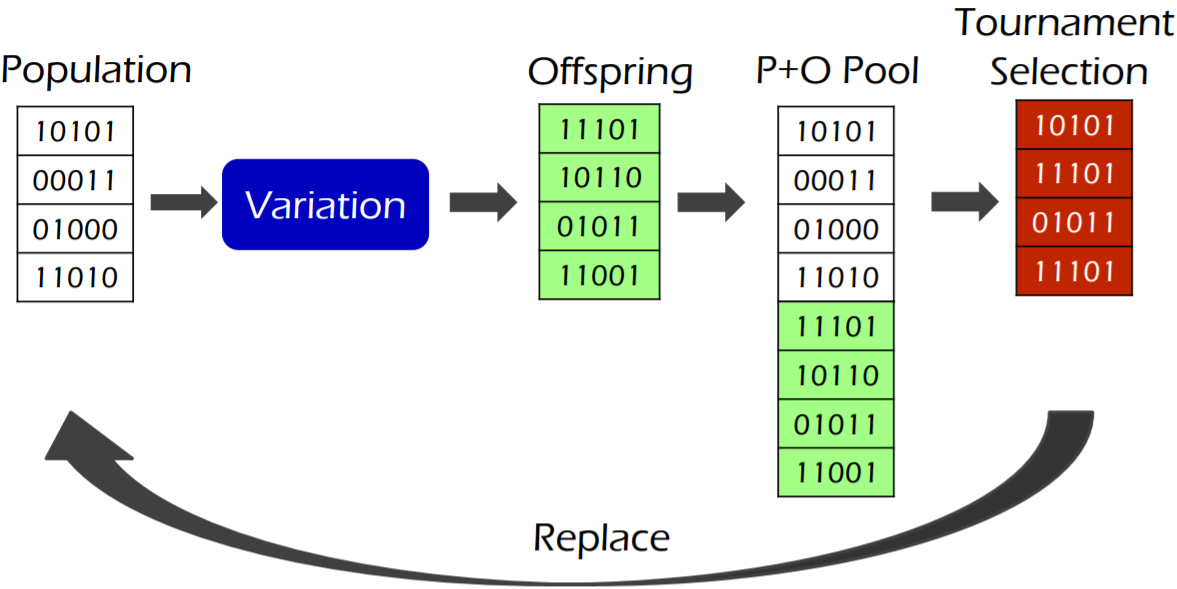

In [ ]:
import numpy as np

# **Hàm khởi tạo quần thể (initialize_population)**

In [ ]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    # Xem quần thể như mảng 2 chiều
    # số hàng = số lượng cá thể
    # số cột = số lượng biến
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    return pop

In [ ]:
# kiểm soát việc phát sinh ngẫu nhiên quần thể bằng seed
np.random.seed(42)
# tạo ra quần thể với 8 cá thể, mỗi cá thể gồm 8 kiểu gene
pop = initialize_population(8,8)
print("Quần thể được tạo ra:")
print(pop)

Quần thể được tạo ra:
[[0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0]]


# **Hàm đánh giá OneMax**
- Hàm này có lời giải tối ưu là chuỗi bit toàn số 1

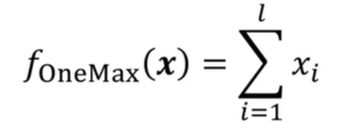

In [ ]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind) # cộng tất cả các giá trị của cá thể => độ thích nghi của cá thể
    
    return value

In [ ]:
print(pop)
# In ra độ thích nghi của cá thể thứ 6 (1 0 1 1): fitness = 3
print("Độ thích nghi của cá thể thứ 6 trong quần thể:", onemax(pop[5,:]))

[[0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0]]
Độ thích nghi của cá thể thứ 6 trong quần thể: 5


# **Hàm bẫy liên tiếp (concatenated_trap_k)**

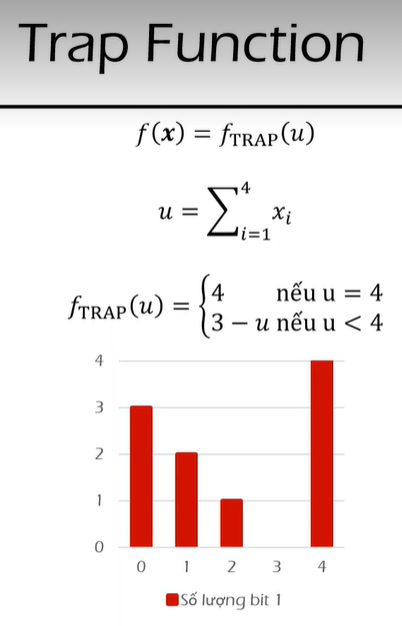

In [ ]:
def concatenated_trap_k(ind, k):
    fitness = 0
    # chia các cá thể thành từng block, mỗi block có k số lượng bit
    for i in range (0, len(ind), k):
        u = 0
        # cộng các bit trong 1 block lại
        for j in range (0, k):
            u += ind[i+j]
        # kiểm tra xem liệu trong block đó có chứa các bit toàn là số 1 hay không
        if u == k:
            fitness += k # chuỗi chứa toàn số 1, nhận giá trị full score
        else:
            fitness += (k - 1 - u) # chuỗi không chứa toàn số 1, nhận giá trị bẫy

    return fitness

In [ ]:
print(pop)
concatenated_trap_k(pop[2,:], k=4) #trap-4

[[0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0]]


0

# **Hàm đánh giá tất cả các cá thể trong quần thể (evaluate_population)**

In [ ]:
def evaluate_population( pop ):
    """
    Hàm đánh giá tất cả cá thể trong quần thể.
    
    Arguments:
    pop -- Quàn thể cần được đánh giá.

    Returns:
    values -- Giá trị của tất cả các cá thể trong quần thể.
    """ 
    # hàm onemax function
    '''values = np.array([onemax(ind) for ind in pop])'''

    #hàm concatenated_trap_k function
    values = np.array([concatenated_trap_k(ind, 4) for ind in pop])
        
    return values

In [ ]:
pop_fitness = evaluate_population(pop)
# In ra giá trị độ thích nghi của từng cá thể trong quần thể
print("Danh sách các giá trị fitness của từng cá thể trong quần thể:", pop_fitness)

Danh sách các giá trị fitness của từng cá thể trong quần thể: [4 4 0 5 2 1 1 5]


# **Hàm so sánh độ thích nghi của 2 cá thể (better_fitness)**

In [ ]:
def better_fitness( fitness_1, fitness_2, maximization=True ):
    """
    Hàm so sánh độ thích nghi của 2 cá thể.
    
    Arguments:
    fitness_1 -- Độ thích nghi của cá thể 1.
    fitness_2 -- Độ thích nghi của cá thể 2.
    maximization -- Biến boolean cho biết bài toán đang giải thuộc dạng tối đa hoá (mặc định) hay không
    
    Returns:
    True nếu fitness_1 tốt hơn fitness_2. Ngược lại, trả về False.
    """
    
    if maximization:
        if fitness_1 > fitness_2:
            return True
    else:
        if fitness_1 < fitness_2:
            return True
        
    return False

In [ ]:
print(pop)

[[0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0]]


# **Hàm chọn lọc cạnh tranh / giao đấu (tournament_selection)**

- Tournament selection: Mỗi lần lấy ngẫu nhiên s cá thể từ quần thể và lựa chọn cá thể có độ thích nghi (fitness) tốt nhất trong số s cá thể này. Chia quần thể thành từng các bảng đấu, kích thước của mỗi bảng là s (số cá thể trong mỗi bảng), tức là tournament size.
- Ta in được quần thể như bên trên. Ta tiến hành xáo trộn thứ tự các quần thể rồi bắt cặp thành các nhóm / bảng (ví dụ kích thước bảng đấu là 4 thì bắt cặp 4 cá thể) rồi cho từng bảng giao đấu với nhau và chọn ra cá thể có độ thích nghi tốt nhất trong bảng đấu đó.
- Nếu chưa đủ số cá thể được lựa chọn, ta tiếp tục xáo trộn thứ tự r bắt cặp thành từng nhóm cho giao đấu với nhau đến khi quần thể đạt hội tụ (converge).

In [ ]:
def tournament_selection( pop, pop_fitness, selection_size, tournament_size):
    """
    Hàm chọn lọc cạnh tranh.
    
    Arguments:
    pop -- Quần thể để thực hiện phép chọn lọc.
    pop_fitness -- Mảng 1 chiều chứa giá trị (độ thích nghi) của từng cá thể trong quần thể.
    selection_size -- Số lượng cá thể sẽ được chọn.
    tournament_size -- Kích thước của tournament: Số lượng các cá thể được so sánh với nhau mỗi lần.
    
    Returns:
    selected_indices -- Chỉ số của những cá thể trong quần thể pop được chọn. Chỉ số có thể được lặp lại.
    """
    
    num_individuals = len(pop) # lấy ra số lượng cá thể
    indices = np.arange(num_individuals) # khai báo mảng indices để lấy chỉ số của từng các cá thể
    selected_indices = [] # danh sách chứa các chỉ số của các cá thể được lựa chọn
    
    while len(selected_indices) < selection_size:
        # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể.
        np.random.shuffle(indices)
        
        for i in range(0, num_individuals, tournament_size): # quét qua số lượng cá thể trong quần thể và chia thành từng bảng đấu
            best_idx = i # cá thể tốt nhất
            for idx in range(1, tournament_size): # cho các cá thể trong bảng đấu với nhau, và chọn đứa có độ thích nghi tốt hơn
                if better_fitness(pop_fitness[indices[i+idx]], pop_fitness[indices[best_idx]]):
                    best_idx = i+idx
            selected_indices.append(indices[best_idx])

    selected_indices = np.array(selected_indices)
        
    return selected_indices

In [ ]:
print(pop)
selected_indices = tournament_selection(pop, pop_fitness, 4, 4) # tournament size = 4
print("Danh sách chỉ số fitness của các cá thể được chọn:", selected_indices)
# Lựa chọn 4 cá thể trong số 8 cá thể trong pool
print("Top 4 cá thể có độ thích nghi tốt nhất trong pool:")
print(pop[selected_indices])

[[0 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0]]
Danh sách chỉ số fitness của các cá thể được chọn: [7 3 7 0]
Top 4 cá thể có độ thích nghi tốt nhất trong pool:
[[1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0]]


- ***Chú thích:*** Ta quan sát được trong quần thể mới được tạo ra sau này, gồm các cá thể tốt nhất sau khi chọn lọc tranh đấu, có 2 nhân bản của cá thể có độ fitness tốt nhất (kiểu gene: 1 1 1 1) trong quần thể này.

# **Hàm biến đổi tạo ra các cá thể con (variation)**

In [ ]:
def variation( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2): # trong quần thể, bắt cặp 2 cá thể liền kề nhau (0,1); (2,3);,...
        idx1 = indices[i]
        idx2 = indices[i+1]
        # tạo ra 2 cá thể con từ 2 cá thể cha mẹ ban đầu
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters): # quét qua từng gene của từng cá thể
            r = np.random.rand() # ứng với mỗi vị trí gene phát sinh một số r ngẫu nhiên
            if r < 0.5: # nếu số ngẫu nhiên r < 0.5, tiến hành hoán đổi
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)
    
    offspring = np.array(offspring)
    return offspring

# **Hàm cài đặt thuật giải di truyền POPOP**

In [ ]:
def popop(num_individuals, num_parameters, num_generations):
    """
    Hàm cài đặt thuật giải di truyền theo các bước P->O->(P+O)->P
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    num_generations -- Số thế hệ thuật toán sẽ chạy.

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    # Khởi tạo quần thể
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population(pop) # Đánh giá quần thể
    print("#Gen 0:")
    print(pop_fitness)
    
    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    for i in range(num_generations):
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation(pop)
        offspring_fitness = evaluate_population(offspring)
        
        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool 
        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        print("#Gen {}:".format(i+1))
        print(pop_fitness)

    print("#Result:")
    print(pop)
    print(pop_fitness)

In [ ]:
# Trường hợp kích thước quần thể là 4, số biến = 4, tức là 1 trap-4
np.random.seed(2)
num_parameters = 4 # số biến
num_individuals = 4
num_generations = 10
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[1 1 1 4]
#Gen 1:
[1 4 4 1]
#Gen 2:
[4 4 4 4]
#Gen 3:
[4 4 4 4]
#Gen 4:
[4 4 4 4]
#Gen 5:
[4 4 4 4]
#Gen 6:
[4 4 4 4]
#Gen 7:
[4 4 4 4]
#Gen 8:
[4 4 4 4]
#Gen 9:
[4 4 4 4]
#Gen 10:
[4 4 4 4]
#Result:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[4 4 4 4]


- ***Nhận xét:*** Với kích thước s = 4 và số biến = 4 ta tìm được chuỗi sau, quần thể đạt hội tụ về 1 cá thể có độ thích nghi tốt nhất, ở đây do số lượng biến ít nên nó tìm được ngay cá thể tốt nhất là (kiểu gene: 1 1 1 1).

In [ ]:
# Trường hợp kích thước quần thể là 4, số biến là 8, tức nối 2 trap-4
np.random.seed(2)
num_parameters = 8 # số biến
num_individuals = 4
num_generations = 10
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[2 5 2 2]
#Gen 1:
[5 5 5 5]
#Gen 2:
[5 5 5 5]
#Gen 3:
[6 5 5 6]
#Gen 4:
[6 6 6 6]
#Gen 5:
[6 6 6 6]
#Gen 6:
[6 6 6 6]
#Gen 7:
[6 6 6 6]
#Gen 8:
[6 6 6 6]
#Gen 9:
[6 6 6 6]
#Gen 10:
[6 6 6 6]
#Result:
[[0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 1]]
[6 6 6 6]


In [ ]:
# Trường hợp kích thước quần thể là 4, số biến là 16, tức nối 4 trap-4
np.random.seed(2)
num_parameters = 16 # số biến
num_individuals = 4
num_generations = 10
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[ 7  4  4 11]
#Gen 1:
[ 4 11 11  5]
#Gen 2:
[11 11 11 11]
#Gen 3:
[11 11 11 11]
#Gen 4:
[11 11 11 11]
#Gen 5:
[11 11 11 11]
#Gen 6:
[11 11 11 11]
#Gen 7:
[11 11 11 11]
#Gen 8:
[11 11 11 11]
#Gen 9:
[11 11 11 11]
#Gen 10:
[11 11 11 11]
#Result:
[[0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]]
[11 11 11 11]


- ***Nhận xét:*** Với số biến = 4, thì problem nhỏ, ta vẫn tìm được lời giải tối ưu của thuật toán. Tuy nhiên khi tăng số biến = 8 - tức là nối 2 trap-4, số biến = 16 - tức là nối 4 trap-4, tới lúc quần thể đạt hội tụ vẫn không tìm được lời giải tối ưu, tức bit toàn số 1.

- ***Nhận xét:*** Lúc này khi đụng bài toán chứa problem khó, để giải được ta tăng pop-size lên (số lượng cá thể trong quần thể) và tăng số thế hệ lên.

In [ ]:
# Trường hợp kích thước quần thể là 8, số biến là 8, tức nối 2 trap-4, đồng thời tăng thế hệ lên 20
np.random.seed(2)
num_parameters = 8 # số biến
num_individuals = 8
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[2 5 2 2 2 2 5 6]
#Gen 1:
[2 5 6 6 5 6 5 6]
#Gen 2:
[5 6 6 6 6 6 6 6]
#Gen 3:
[6 6 6 6 6 6 6 6]
#Gen 4:
[6 6 6 6 6 6 6 6]
#Gen 5:
[6 6 6 6 6 6 6 6]
#Gen 6:
[6 6 6 6 6 6 6 6]
#Gen 7:
[6 6 6 6 6 6 6 6]
#Gen 8:
[6 6 6 6 6 6 6 6]
#Gen 9:
[6 6 6 6 6 6 6 6]
#Gen 10:
[6 8 6 6 6 6 8 6]
#Gen 11:
[6 8 6 6 6 6 8 8]
#Gen 12:
[8 8 8 8 8 8 8 8]
#Gen 13:
[8 8 8 8 8 8 8 8]
#Gen 14:
[8 8 8 8 8 8 8 8]
#Gen 15:
[8 8 8 8 8 8 8 8]
#Gen 16:
[8 8 8 8 8 8 8 8]
#Gen 17:
[8 8 8 8 8 8 8 8]
#Gen 18:
[8 8 8 8 8 8 8 8]
#Gen 19:
[8 8 8 8 8 8 8 8]
#Gen 20:
[8 8 8 8 8 8 8 8]
#Result:
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[8 8 8 8 8 8 8 8]


- ***Nhận xét:*** Lúc này, sau khi thực hiện tăng pop-size lên, ta đã tìm được lời giải tối ưu khi quần thể đạt hội tụ. Tuy nhiên để kiểm chứng độ chắc chắn của bài toán, ta sẽ thay đổi các giá trị seed khác nhau của nó.

In [ ]:
# Trường hợp kích thước quần thể là 8, số biến là 8, tức nối 2 trap-4, số lượng thế hệ = 20, seed = 1.
np.random.seed(1)
num_parameters = 8 # số biến
num_individuals = 8
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[5 2 4 4 6 4 2 2]
#Gen 1:
[5 5 6 5 4 5 6 5]
#Gen 2:
[6 6 5 5 5 5 6 6]
#Gen 3:
[5 6 6 6 6 6 6 6]
#Gen 4:
[6 6 6 6 6 6 6 6]
#Gen 5:
[6 6 6 6 6 6 6 6]
#Gen 6:
[6 6 6 6 6 6 6 6]
#Gen 7:
[6 6 6 6 6 6 6 6]
#Gen 8:
[6 6 6 6 6 6 6 6]
#Gen 9:
[6 6 6 6 6 6 6 6]
#Gen 10:
[6 6 6 6 6 6 6 6]
#Gen 11:
[6 6 6 6 6 6 6 6]
#Gen 12:
[6 6 6 6 6 6 6 6]
#Gen 13:
[6 6 6 6 6 6 6 6]
#Gen 14:
[6 6 6 6 6 6 6 6]
#Gen 15:
[6 6 6 6 6 6 6 6]
#Gen 16:
[6 6 6 6 6 6 6 6]
#Gen 17:
[6 6 6 6 6 6 6 6]
#Gen 18:
[6 6 6 6 6 6 6 6]
#Gen 19:
[6 6 6 6 6 6 6 6]
#Gen 20:
[6 6 6 6 6 6 6 6]
#Result:
[[1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]]
[6 6 6 6 6 6 6 6]


- ***Nhận xét:*** Chỉ cần ta đổi giá trị seed = 1, ta lại thấy kết quả khi quần thể đạt hội tụ, không thể tìm được lời giải tối ưu. Tức là, khi ta thử với seed = 2, chẳng qua ta gặp "may mắn" khi tìm được kết quả tối ưu này. Ta phải thử liên tiếp bằng cách tăng số lượng cá thể trong quần thể và thử nhiều seed khác nhau cho đến khi đều đạt được lời giải tối ưu.

In [ ]:
# Trường hợp kích thước quần thể là 64, số biến là 8, tức nối 2 trap-4, số lượng thế hệ = 20, seed = 1.
np.random.seed(1)
num_parameters = 8
num_individuals = 64
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[5 2 4 4 6 4 2 2 5 3 1 2 0 7 3 0 3 0 2 4 2 4 3 5 1 3 2 4 3 0 1 5 4 5 3 4 2
 3 1 1 3 1 7 5 2 3 4 2 2 3 1 3 4 6 1 5 4 4 2 3 5 4 2 2]
#Gen 1:
[4 5 8 6 4 5 4 5 5 5 7 4 4 2 3 5 4 5 6 4 5 7 5 4 4 3 4 3 2 4 7 4 6 5 7 5 4
 5 4 4 3 5 4 4 2 5 7 4 8 3 5 3 5 4 4 5 4 2 4 6 5 4 5 5]
#Gen 2:
[5 5 5 6 5 4 6 5 6 8 7 5 8 4 5 5 4 5 7 5 5 6 7 7 5 7 5 5 8 4 7 6 5 5 7 7 5
 8 6 8 4 6 5 7 8 6 6 5 7 4 6 6 6 6 4 5 7 5 5 5 5 5 5 4]
#Gen 3:
[8 7 6 7 6 7 6 6 8 5 7 6 6 6 6 6 8 8 7 5 4 5 8 5 6 7 7 7 8 7 7 7 8 8 7 6 4
 6 8 6 6 6 5 8 6 7 5 7 5 7 6 5 5 6 6 7 5 5 8 8 7 7 7 5]
#Gen 4:
[7 7 8 7 8 7 7 7 7 7 8 7 8 7 7 8 8 7 8 6 6 6 7 7 8 6 8 8 8 7 8 6 8 8 7 8 8
 8 6 6 8 7 8 8 7 7 8 8 8 7 8 5 7 7 6 6 8 6 6 7 7 8 7 6]
#Gen 5:
[8 7 8 8 8 7 8 6 8 8 8 8 7 8 8 6 8 8 8 7 8 8 8 8 8 8 7 8 8 8 8 8 8 7 8 8 7
 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 7]
#Gen 6:
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
#Gen 7:
[8 8 8 8 8 8 8 8 8 

In [ ]:
# Trường hợp kích thước quần thể là 64, số biến là 8, tức nối 2 trap-4, số lượng thế hệ = 20, seed = 2.
np.random.seed(2)
num_parameters = 8
num_individuals = 64
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[2 5 2 2 2 2 5 6 1 2 4 5 4 1 2 3 0 2 0 2 3 1 2 2 2 0 6 5 2 2 1 3 6 1 3 2 1
 2 2 3 5 4 0 1 4 1 3 1 4 8 3 2 2 2 2 4 1 2 4 2 0 1 3 1]
#Gen 1:
[6 3 4 5 8 6 2 3 2 6 2 5 8 1 4 3 5 5 4 2 4 4 4 4 5 4 2 2 3 6 6 6 6 6 5 3 5
 8 3 2 5 3 3 5 6 4 4 4 3 6 4 2 6 4 4 8 2 2 5 3 2 3 4 4]
#Gen 2:
[8 8 6 4 4 3 8 4 6 5 4 6 5 6 6 4 6 4 5 8 6 4 6 5 6 5 6 5 4 3 6 6 6 4 6 6 4
 4 6 4 6 4 6 4 4 5 5 5 5 6 8 5 6 6 8 4 6 6 4 6 8 4 5 5]
#Gen 3:
[8 8 8 6 4 6 4 6 6 6 6 7 8 6 6 5 8 8 6 8 5 8 8 6 6 6 5 6 8 4 6 7 8 6 5 8 6
 8 5 7 5 8 8 6 4 8 6 5 6 8 6 6 3 6 6 6 6 8 5 7 5 6 8 8]
#Gen 4:
[8 8 8 8 8 8 8 8 7 8 6 6 7 8 8 8 8 8 8 8 7 8 6 6 8 8 6 8 8 6 8 4 6 8 6 8 7
 8 8 7 8 8 8 6 8 8 8 8 6 8 6 8 8 8 8 8 8 8 8 8 8 6 8 8]
#Gen 5:
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 8 8 8 8 8 8 8 8 7 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
#Gen 6:
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
#Gen 7:
[8 8 8 8 8 8 8 8 8 

In [ ]:
# Trường hợp kích thước quần thể là 64, số biến là 8, tức nối 2 trap-4, số lượng thế hệ = 20, seed = 21.
np.random.seed(21)
num_parameters = 8
num_individuals = 64
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[3 3 2 4 3 4 3 3 1 5 7 3 2 1 4 4 3 4 4 5 4 0 3 4 3 1 1 4 3 3 2 1 1 1 2 5 2
 1 4 1 3 2 2 1 2 3 5 2 3 0 1 1 2 2 3 2 2 2 2 3 0 2 3 3]
#Gen 1:
[4 3 3 4 4 2 4 4 5 4 3 4 5 2 4 4 5 4 3 4 4 3 5 4 5 4 4 4 7 5 6 6 5 4 5 3 4
 5 5 4 4 4 3 6 4 4 4 4 4 3 7 4 5 4 5 3 4 4 3 4 4 3 4 6]
#Gen 2:
[6 5 5 7 3 6 4 2 4 5 4 5 5 5 6 5 6 6 5 4 5 5 4 4 5 7 5 5 4 6 4 5 5 5 5 4 5
 7 6 6 4 4 6 4 6 4 7 4 5 5 4 6 4 4 4 4 6 5 5 5 5 4 5 5]
#Gen 3:
[5 5 6 7 4 6 5 7 6 5 7 6 6 4 5 6 5 6 5 5 5 5 7 7 7 6 7 6 7 6 5 7 5 5 6 5 5
 7 6 5 4 7 5 6 7 4 5 7 6 6 5 5 6 6 5 7 5 7 5 7 6 7 7 6]
#Gen 4:
[7 6 7 6 6 7 7 6 6 6 7 6 5 5 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 7 5 7 7 7 7
 6 7 6 7 7 6 7 7 7 7 7 7 7 7 6 7 7 7 7 8 6 5 7 7 7 6 6]
#Gen 5:
[7 7 7 7 7 7 8 7 7 8 7 7 8 7 7 7 7 7 7 7 7 7 6 8 7 7 7 7 7 7 7 7 8 7 7 8 7
 7 7 7 7 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6]
#Gen 6:
[7 8 7 7 7 8 7 7 7 7 7 7 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7 8 8 8 7 7 7 7 7 7 8
 8 7 7 7 8 7 7 7 7 7 8 7 7 7 7 8 7 7 7 7 7 8 7 7 7 7 7]
#Gen 7:
[8 7 7 8 8 7 8 7 8 

- ***Nhận xét:*** Khi ta thử tới kích thước quần thể s = 64, dùng 2 trap-4, và thay đổi nhiều seed khác nhau (1,2, 21,...) và sau khoảng 20 thế hệ ta thấy thuật toán giải được khi vẫn tìm được lời giải tối ưu khi quần thể đạt được hội tụ với cá thể có độ thích nghi tốt nhất (kiểu gene: 1 1 1 1 1 ... 1 1) với cách sử dụng hàm đánh giá là Concatenated Trap function.

In [ ]:
# Trường hợp kích thước quần thể là 512, số biến là 16, tức nối 4 trap-4, số lượng thế hệ = 20, seed = 1.
np.random.seed(1)
num_parameters = 16
num_individuals = 512
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[ 7  8 10  4  8  3  7  3  3  6  6  8  4  6  3  6  9  7  5  2  4 12  5  6
  5  4 10  6  8  5  9  4  9  7  6  9  5  7  8  5  8  5  5  6  5  5  4  5
  6  6  7  4  6 10  5  4  6  4  5  5 11  6  9  5  7  4  6  9  5  4  5  5
  8  5  4  5  6  4  8  5  5  4  1  3  4  3  7  3  4  5  9  3  3  3  8  7
  6  4  4  5  4  5  3  8  4  3  4  7  4  5  2  4  2  6  5  6  4  3  5  7
  5  9  7  3  8  5  4  9 10  5  7  5  7 10  7  5  5  8  4  4  5  2  3  6
  3  8  9  5  6  5  6  2  6  5  7  3  3  5  4  5  7  3  9  8  1  4  5  5
  6  5  4  4  5  5  5  6  3  4  9  6  4  9  8  2  7  7  7  7  3  4  7  3
  3  7  6  4  3  6  4  2  8  5  7  3  2  5  7  5  5  2  5  7  2  4  6  7
  2  7  0  4  5  6  8  7  4  8  3  9  9  8  6  3  5  8  3  7  8  2  1  3
  4  2  4  6  5  6  5  3  6  5  6  3  5  7  0  3  3  7  5  5  6  3  3  7
  8  6  6  2  3  6  4  6 12  3  9  4  4  2  3  3  7  3  4  4  9  4  6  3
  4  4  4  4  7  3  4  3  3  2  5  3  6  5  8  6  7  5  8  5  4  3  6  9
  6  6  7  5 10  3  7  4  2  5  5  3  9  3 

In [ ]:
# Trường hợp kích thước quần thể là 512, số biến là 16, tức nối 4 trap-4, số lượng thế hệ = 20, seed = 2.
np.random.seed(2)
num_parameters = 16
num_individuals = 512
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[ 7  4  4 11  3  9  5  5  2  2  4  4  2 11  4  4  7  5  3  5  9  1  5  4
 12  5  4  6  3  6  1  4 10  7  2  4  6  9  7  4  9  6  6  5  5  5  8  3
  1  3  5  7  8  4 10  5  8 10  6  4  6  5  2  2 10  2  5  7  5  8 10  2
  2  8  6  4  6  6  7  2  6  5  6  3  4  9  0  5 12  8 12  6  4  5  5  4
  5  2  8  3  4  2  6  5  1  6  4  2  5  6  2  5  3  7  5  8  3  5  1  4
 10  3  3  5  3  5  4  4  8  4  6  4  5  4  8  5  6  5  7  4  8  9  5  4
  7  4  5  2  5  3  5  9  6  9  7  3  4  6  4  6  6  2  6  2  8  3  5  2
  5  4  6  5  5  5  5  5  4  4  6  8  4  9  6  5  2  5  5  5  2  9  6  6
  4  3  4  2  3  4  8  6  6 11  2  5  5  2  3  6  8  5  1  7  9  3  8  5
  5  3  7  7  6  7  5  2  7  6  6  5  7  3  6  8  6  8  4  8  9  6  5  2
  7  6  7  4  4  4  3  6  0  4  8  3  6  5  4  3 10  5  4  6  3  1  4  3
  4  4  8  2  7  7  7  5  8  3  5  3  4  8  1  4  6  6  1  4  2  5  6  5
  7  2  5  5  8  4  3  2  5  9  3  2  2  5  1  3  4  2  2  6  5  6  3  5
  4  4  5  6  4  5  6  4  7  6  7  5  9  9 

In [ ]:
# Trường hợp kích thước quần thể là 512, số biến là 16, tức nối 4 trap-4, số lượng thế hệ = 20, seed = 21.
np.random.seed(21)
num_parameters = 16
num_individuals = 512
num_generations = 20
popop(num_individuals, num_parameters, num_generations)

#Gen 0:
[ 6  6  7  6  6 10  3  8  7  9  4  7  4  5  6  3  2  7  3  5  5  3  5  7
  3  2  4  5  4  5  2  6  6  5  6  4  4  5  4  9  8  2  9  6  8  6  4  6
  5  3  4  3  4  6  3  4  6  7  7  7  6  5  6  7  2  5  9  4  9  2  5  7
  4  5  5  9  8 10  9  3  2  7  3  5  6  5  8  6  7  2  5  6  2  3  9 10
  4  2  5  4  4  3  5  2  7  5 10  2  5  2  3  5  3  6  4  3  5  3  2  3
  9  5  5  6  8  4  4  4  4  2  4 10  5  6  5  8  5  7  5  3  6  4  5  4
  4  0  2  3  3  8  6  9  2  6  4 10  5  4  5  5  5  5  5  6  4  8  7  2
  4  3  2  5  5  3  4  3  6  9 12  6  4  7 10  4  6  8  2  5  5  6  3  7
  4  9  8  2  3  7  3  2  4 12  3  5  6  5  7  8  6  6  5  9  2  3  5  5
  7  2  4  6  0  5  4  5  2  3  6  3  3  5  6  6  5  5  6  1  5  7  6  4
  5  5  3  6  7  4  6 11  7  2  6  6  2  7 10  3  5  5  5 10  5  9  4  4
  4  4  7  5  3  5 10  7  8  3  5  8  7  9  5  2  6  6  2 10  2  5  4  6
  9  5  4  9  6  5  8  3  6  6  7  7  4  4  4  7  2  7  4  4  0  8  4  6
  7  7  4  9  9  2  8  8  6  6  3  6  8  3 

- ***Nhận xét:*** Khi ta thử tới kích thước quần thể s = 512, dùng 4 trap-4, và thay đổi nhiều seed khác nhau (1,2, 21,...) và sau khoảng 20 thế hệ ta thấy thuật toán giải được khi vẫn tìm được lời giải tối ưu khi quần thể đạt được hội tụ với cá thể có độ thích nghi tốt nhất (kiểu gene: 1 1 1 1 1 ... 1 1) với cách sử dụng hàm đánh giá là Concatenated Trap function.